In [94]:
# 기본 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML 라이브러리
import sklearn
from sklearn.svm import SVC
from sklearn.cluster import KMeans
# from sklearn.logg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Dataset
from sklearn.datasets import load_iris
# Encoder

import os

# AICentro
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.optimizers import RMSprop

In [17]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 9999

In [18]:
somf_data = pd.read_csv('./ai_somf_sit_t2_202007021.csv', na_values = '0')
somf_data.head()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN
0,2800004,18079649556559N,1807964955655-17768442040,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
1,2800328,18079659558499N,1807965955849-11857631630,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
2,2801054,18079679571679N,1807967957167-11126575850,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
3,2801056,18079679568549N,1807967956854-11176557750,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN
4,2801170,18079679569829N,1807967956982-11167658930,4,NaN,NaN,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDActivationReceiver_D_WaitingForResponse,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NaN,NaN,NaN,NaN,FulfillmentControllerReceiver_D_WaitingForResponse,NaN


In [19]:
somf_functions = ['ORRE', 'PRDI', 'LORD', 'PHRD', 'RECO', 'WODI', 'REAC', 'JUJO', 'FUCO',
       'SWBO', 'MAUP', 'IDMS', 'MEIN', 'CEMS', 'MCID', 'DELS', 'VOIP', 'FUCF','ORCN']

pna_functions = ['ORRE', 'PRDI', 'LORD', 'PHRD','RECO', 'WODI', 'REAC', 'JUJO', 'SWBO', 'FUCO', 'MAUP', 'ORCN']

In [20]:
somf_data_pre = somf_data
somf_data_pre[somf_functions] = somf_data_pre[somf_functions].fillna('NONE_NONE_NONE')
somf_data_pre.head()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN
0,2800004,18079649556559N,1807964955655-17768442040,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
1,2800328,18079659558499N,1807965955849-11857631630,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
2,2801054,18079679571679N,1807967957167-11126575850,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
3,2801056,18079679568549N,1807967956854-11176557750,4,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE
4,2801170,18079679569829N,1807967956982-11167658930,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE


In [21]:
tasks_list = list()

for function in somf_functions:
    temp_list = list(somf_data_pre.groupby([function])[function].count().index)
    for task in temp_list:
        tasks_list.append(task)
                
tasks_set = set(tasks_list)
tasks_dict = {j : i for i,j in enumerate(tasks_set)}

In [22]:
# data = [tasks_dict[i] for i in somf_data_pre['ORRE'].tolist()]

# for function in somf_functions:
#     somf_data_pre[function] = [tasks_dict[i] for i in somf_data_pre[function].tolist()]

# somf_data_pre

In [23]:
somf_defect = pd.read_csv('./ai_somf_sit_defect_202007021.csv', na_values = '0')
somf_defect = somf_defect[['ORDER_SEQ_ID', 'LABEL']]

In [32]:
somf_data_pre_wDefect = somf_data_pre.merge(somf_defect, left_on='ORDER_SEQ_ID', right_on='ORDER_SEQ_ID', how='left', sort=True)

In [33]:
label_set = set(somf_data_pre_wDefect['LABEL'])
label_dict = {j : i for i,j in enumerate(label_set)}
label_dict

{nan: 0, 'ORRE_PENDING': 1, 'OPE': 2, 'ACCEPT': 3, 'RECEIVED': 4, 'ORP': 5}

In [26]:
somf_data_pre_wDefect['LABEL'] = [label_dict[i] for i in somf_data_pre_wDefect['LABEL'].tolist()]

somf_data_pre_wDefect.head()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,FUCO,SWBO,MAUP,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN,LABEL
0,2800004,18079649556559N,1807964955655-17768442040,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE,0
1,2800328,18079659558499N,1807965955849-11857631630,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE,2
2,2801054,18079679571679N,1807967957167-11126575850,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE,0
3,2801056,18079679568549N,1807967956854-11176557750,4,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_accepted,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE,2
4,2801170,18079679569829N,1807967956982-11167658930,4,NONE_NONE_NONE,NONE_NONE_NONE,LogicalDesignAndAssignReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,IDActivationReceiver_D_WaitingForResponse,OPEFalloutPnANotificationReceiver_D_WaitingForResponse,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,FulfillmentControllerReceiver_D_WaitingForResponse,NONE_NONE_NONE,2


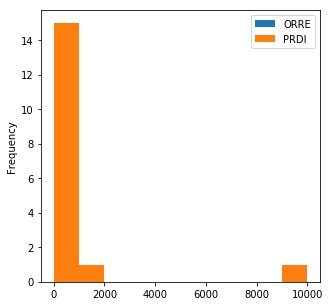

In [93]:
plt.rc('figure', figsize = (5,5))
defected_order = somf_data_pre_wDefect.loc[somf_data_pre_wDefect['LABEL'].notnull()]
values = defected_order.groupby(['ORRE','PRDI'])['ORRE','PRDI'].count()
values.plot(kind='hist')
# plt.plot(values, 'k', color ='r')

In [102]:
s = pd.Series(np.random.randn(10).reshape(2, -1).cumsum())

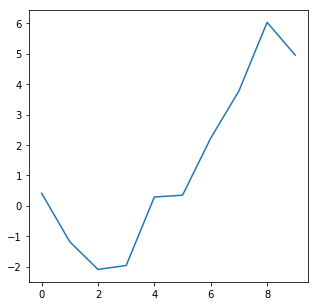

In [104]:
s.plot()

### PNA data

In [106]:
pna_data = pd.read_csv('./ai_pna_sit_t2_202007021.csv')

/Users/puri/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
pna_data.head()

,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,OPN_HOPE_DATE,RMVL_HOPE_DATE,ICIS_CMPLN_DATE,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,SWBO,FUCO,MAUP,ORCN
0,09354A400824790,09354A4008247-10259364790,O2,0822,20/01/13,20/01/13,8,09/12/22,NaN,NaN,ORRE_2_OKEY,PRDI_0_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09355I026668290,09355I0266682-11854166130,OA,0928,20/03/26,20/03/26,5,20/03/28,NaN,NaN,ORRE_2_OKEY,PRDI_0_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10062F021795490,10062F0217954-11934637900,OA,0928,20/03/26,20/03/26,18,20/03/31,NaN,NaN,ORRE_2_OKEY,PRDI_0_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103395001817690,1033950018176-60075682270,O2,0799,20/01/13,20/01/13,13,10/12/07,NaN,NaN,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NaN,NaN,NaN,REAC_3_REAC004,NaN,NaN,NaN,NaN,NaN
4,11008E508087991,11008E508087991,SI,0V02,20/01/21,20/01/21,1,20/01/23,NaN,NaN,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
pna_group = pd.DataFrame(pna_data.groupby(['ORDR_TYPE_ID'])['CUST_ORDR_NO'].max())
pna_group['Count'] = pna_data.groupby(['ORDR_TYPE_ID'])['CUST_ORDR_NO'].count()
pna_group.sort_values('Count', ascending=False)

,CUST_ORDR_NO,Count
ORDR_TYPE_ID,,
V1,TESTSLCLI609999,13381
VA,SUSPDAIPTV90990,7227
OB,20179417683489N,2618
SB,20183K32691199N,2221
S2,201849K0228879N,2165
WB,20181M15303259N,2041
UA,20183FS2690589N,1934
OA,T9296F47500969N,1218
O1,20178KX7682759N,909


In [168]:
pna_data.groupby('ORDR_TYPE_ID').size()

ORDR_TYPE_ID
A1         78
A2          2
A3          1
A4          1
AA          1
AD          1
B1        312
B3         22
BA          3
BAAA       21
BB          3
BBAB        2
BQAQ        1
C1         62
D2         16
D3          3
D4B1        1
D5          5
E3         37
EA          1
EO         41
EP         65
FX          6
GA          1
I1          9
I2         12
I4          4
I6          8
J1        203
J2        214
J3          1
K8          8
K9          8
KA          3
KB          2
KE          2
KFKE        1
KZ          9
L1         33
L2         85
M1         48
M2          3
M7        335
N1         10
N2         17
N3         20
O1        909
O2        867
OA       1218
OAD4        1
        ...  
OLOK       55
ONOM       10
PB         10
PD          5
PE         18
PF          2
PG         24
QB          1
QBQA       23
S1        189
S2       2165
SA        715
SB       2221
SC        131
SI        545
TFRF        1
TG          9
TGRG       34
TLRL        6
TORO   

 
### Analysis

In [126]:
pna_ordr_type_id = pna_data['ORDR_TYPE_ID']

value_cnt = pna_ordr_type_id.value_counts().sort_values(ascending=False)


V1      13381
VA       7227
OB       2618
SB       2221
S2       2165
WB       2041
UA       1934
OA       1218
O1        909
O2        867
VI        731
V2        730
SA        715
SI        545
M7        335
B1        312
XI        277
J2        214
J1        203
VE        190
S1        189
OE        174
VB        161
VF        146
OF        144
XHXG      138
SC        131
VC        105
XB        103
U2         95
L2         85
A1         78
UB         67
EP         65
C1         62
OLOK       55
U1         51
M1         48
UC         47
EO         41
E3         37
TGRG       34
L1         33
UI         31
PG         24
QBQA       23
B3         22
BAAA       21
N3         20
XT         20
        ...  
VT         13
I2         12
XG         11
N1         10
PB         10
ONOM       10
TG          9
I1          9
XF          9
KZ          9
K9          8
TT          8
K8          8
I6          8
TLRL        6
FX          6
TORO        5
D5          5
PD          5
XA          4
I4    

In [133]:
import seaborn as sns

In [149]:
orderType_df = pd.DataFrame({'ORDERTYPE' : value_cnt.index, 'CNT' : value_cnt.values})

orderType_df = orderType_df[0:10]

# help(pd.DataFrame)

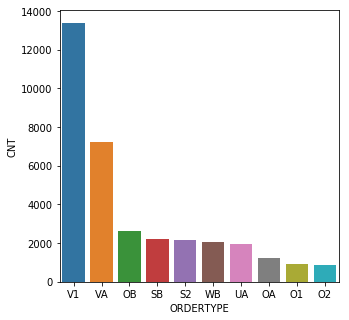

In [150]:
sns.barplot(x = orderType_df.ORDERTYPE, y = orderType_df.CNT, data=orderType_df[0:10])

# Pre processing

### Pre-Processing_null handling

In [348]:
pna_data_pre = pna_data
pna_data_pre[pna_functions] = pna_data_pre[pna_functions].fillna('NONE_NONE_NONE')
pna_data_pre['PROD_ID'].fillna('BOOO', inplace =True)
pna_data_pre['ICIS_CMPLN_DATE'].fillna(False, inplace=True)
pna_data_pre['ICIS_CMPLN'] = [0 if i is False else 1 for i in pna_data_pre['ICIS_CMPLN_DATE']]
pna_data_pre.drop(['ICIS_CMPLN_DATE'], axis=1, inplace=True)
pna_data_pre.dropna(axis=1, inplace=True)


In [349]:
order_type_set = set(pna_data_pre['ORDR_TYPE_ID'])
orderType_dict = {j : i for i,j in enumerate(order_type_set)}

PROD_ID_set = set(pna_data_pre['PROD_ID'])
PROD_ID_dict = {j : i for i,j in enumerate(PROD_ID_set)}

In [350]:
pna_data_pre['ORDR_TYPE_ID'] = [orderType_dict[i] for i in pna_data_pre['ORDR_TYPE_ID'].tolist()]
pna_data_pre['PROD_ID'] = [PROD_ID_dict[i] for i in pna_data_pre['PROD_ID'].tolist()]

pna_data_pre

,CUST_ORDR_NO,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,FIRST_CRET_DT,LAST_CHG_DT,CUST_ORDR_VER_NO,ORRE,PRDI,LORD,PHRD,RECO,WODI,REAC,JUJO,SWBO,FUCO,MAUP,ORCN,ICIS_CMPLN
0,09354A400824790,09354A4008247-10259364790,87,12,20/01/13,20/01/13,8,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
1,09355I026668290,09355I0266682-11854166130,8,86,20/03/26,20/03/26,5,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
2,10062F021795490,10062F0217954-11934637900,8,86,20/03/26,20/03/26,18,ORRE_2_OKEY,PRDI_0_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
3,103395001817690,1033950018176-60075682270,87,23,20/01/13,20/01/13,13,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,REAC_3_REAC004,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
4,11008E508087991,11008E508087991,80,24,20/01/21,20/01/21,1,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41382,TESTSLCLI609996,TESTSLCLI609996,35,69,20/06/05,20/06/12,11,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,MAUP_2_OKEY,ORCN_2_OKEY,1
41383,TESTSLCLI609997,TESTSLCLI609997,35,69,20/06/05,20/06/05,11,ORRE_2_OKEY,PRDI_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
41384,TESTSLCLI609998,TESTSLCLI609998,35,69,20/06/05,20/06/05,11,ORRE_2_OKEY,PRDI_2_OKEY,LORD_3_LORD997,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,0
41385,TESTSLCLI609999,TESTSLCLI609999,35,69,20/06/05,20/06/12,11,ORRE_2_OKEY,PRDI_2_OKEY,LORD_2_OKEY,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,NONE_NONE_NONE,MAUP_2_OKEY,ORCN_2_OKEY,1


In [351]:
proc_list = list()

for function in pna_functions:
    temp_list = list(pna_data_pre.groupby([function])[function].count().index)
    for proc in temp_list:
        proc_list.append(proc)
                
proc_set = set(proc_list)
proc_dict = {j : i for i,j in enumerate(proc_set)}

for function in pna_functions:
    pna_data_pre[function] = [proc_dict[i] for i in pna_data_pre[function].tolist()]


### Unified data

In [352]:
somf_pna_data = somf_data_pre_wDefect.merge(pna_data_pre, left_on='BUSINESSCOMPONENTID', right_on='ORDR_COMPOSI_IDFY_ID', suffixes = ('_S','_P'),  how='left',  sort=True)

In [353]:
somf_pna_data['CUST_ORDR_VER_NO'].fillna(0, inplace =True)
somf_pna_data['ICIS_CMPLN'].fillna(0, inplace =True)
somf_pna_data.fillna({'ORDR_TYPE_ID' : -1, 'PROD_ID' : -1}, inplace =True)

for func in pna_function1:
    somf_pna_data[func].fillna(-1, inplace=True)
somf_pna_data.fillna('NONE', inplace =True)
somf_pna_data.drop(['FIRST_CRET_DT', 'LAST_CHG_DT', 'CUST_ORDR_NO'], axis=1, inplace=True)
somf_pna_data.iloc[:, 31:43]

,PHRD_P,RECO_P,WODI_P,REAC_P,JUJO_P,SWBO_P,FUCO_P,MAUP_P,ORCN_P,ICIS_CMPLN
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,0.0
2,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,0.0
3,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,0.0
4,102.0,102.0,102.0,74.0,102.0,102.0,102.0,102.0,102.0,0.0
...,...,...,...,...,...,...,...,...,...,...
37523,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
37524,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
37525,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
37526,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [354]:
somf_pna_data['ORDR_TYPE_ID'] = somf_pna_data['ORDR_TYPE_ID'].astype('int64')
somf_pna_data['PROD_ID'] = somf_pna_data['PROD_ID'].astype('int64')
somf_pna_data['CUST_ORDR_VER_NO'] = somf_pna_data['CUST_ORDR_VER_NO'].astype('int64')
somf_pna_data['ICIS_CMPLN'] = somf_pna_data['ICIS_CMPLN'].astype('int64')

for func in pna_function1:
    somf_pna_data[func] = somf_pna_data[func].astype('int64')


In [355]:
somf_pna_data.groupby(['ICIS_CMPLN']).count()

,ORDER_SEQ_ID,ORDERNUMBER,BUSINESSCOMPONENTID,ORDERSTATE,ORRE_S,PRDI_S,LORD_S,PHRD_S,RECO_S,WODI_S,REAC_S,JUJO_S,FUCO_S,SWBO_S,MAUP_S,IDMS,MEIN,CEMS,MCID,DELS,VOIP,FUCF,ORCN_S,LABEL,ORDR_COMPOSI_IDFY_ID,ORDR_TYPE_ID,PROD_ID,CUST_ORDR_VER_NO,ORRE_P,PRDI_P,LORD_P,PHRD_P,RECO_P,WODI_P,REAC_P,JUJO_P,SWBO_P,FUCO_P,MAUP_P,ORCN_P
ICIS_CMPLN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495,37495
1,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [356]:
somf_pna_data.columns

Index(['ORDER_SEQ_ID', 'ORDERNUMBER', 'BUSINESSCOMPONENTID', 'ORDERSTATE',
       'ORRE_S', 'PRDI_S', 'LORD_S', 'PHRD_S', 'RECO_S', 'WODI_S', 'REAC_S',
       'JUJO_S', 'FUCO_S', 'SWBO_S', 'MAUP_S', 'IDMS', 'MEIN', 'CEMS', 'MCID',
       'DELS', 'VOIP', 'FUCF', 'ORCN_S', 'LABEL', 'ORDR_COMPOSI_IDFY_ID',
       'ORDR_TYPE_ID', 'PROD_ID', 'CUST_ORDR_VER_NO', 'ORRE_P', 'PRDI_P',
       'LORD_P', 'PHRD_P', 'RECO_P', 'WODI_P', 'REAC_P', 'JUJO_P', 'SWBO_P',
       'FUCO_P', 'MAUP_P', 'ORCN_P', 'ICIS_CMPLN'],
      dtype='object')

In [357]:
x_data_col = ['ORDERSTATE',
       'ORRE_S', 'PRDI_S', 'LORD_S', 'PHRD_S', 'RECO_S', 'WODI_S', 'REAC_S',
       'JUJO_S', 'FUCO_S', 'SWBO_S', 'MAUP_S', 'IDMS', 'MEIN', 'CEMS', 'MCID',
       'DELS', 'VOIP', 'FUCF', 'ORCN_S',
       'ORDR_TYPE_ID', 'PROD_ID', 'CUST_ORDR_VER_NO', 'ORRE_P', 'PRDI_P',
       'LORD_P', 'PHRD_P', 'RECO_P', 'WODI_P', 'REAC_P', 'JUJO_P', 'SWBO_P',
       'FUCO_P', 'MAUP_P', 'ORCN_P', 'ICIS_CMPLN']
y_data_col = ['LABEL'] 

In [358]:
x_data = somf_pna_data[x_data_col]
y_data = somf_pna_data[y_data_col]

### ML

In [359]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [360]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

result = model.predict(x_test)
accuracy = metrics.accuracy_score(result, y_test)
accuracy

0.9950969942442975

### Tree check

In [361]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [362]:
dot_data = export_graphviz(model, out_file=None, 
            feature_names=x_train.columns,
            class_names=['0', '1', '2', '3', '4', '5'],
            filled=True, 
            rounded=True,  
            special_characters=True)  

In [363]:
from sklearn.metrics import accuracy_score

y_pred_tr = model.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 1.00


In [364]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### New start

### DL

In [365]:
# 데이터 shape 을 확인해 봅니다.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
in_batch_size = 5000
in_epochs = 100
num_class = 6


(28146, 36) (28146, 1) (9382, 36) (9382, 1)


In [369]:
model = Sequential()
model.add(Dense(160, activation='tanh', input_shape=(36,)))
model.add(Dropout(0.5))
model.add(Dense(360, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 160)               5920      
_________________________________________________________________
dropout_12 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 360)               57960     
_________________________________________________________________
dropout_13 (Dropout)         (None, 360)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                11552     
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                

In [370]:
history = model.fit(x_train, y_train,
                    batch_size=in_batch_size,
                    epochs=in_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 28146 samples, validate on 9382 samples
Epoch 1/100
28146/28146 [==============================] - 1s 40us/sample - loss: 1.1992 - acc: 0.5727 - val_loss: 0.7054 - val_acc: 0.7259
Epoch 2/100
28146/28146 [==============================] - 1s 27us/sample - loss: 0.8539 - acc: 0.7198 - val_loss: 0.5662 - val_acc: 0.8250
Epoch 3/100
28146/28146 [==============================] - 1s 25us/sample - loss: 0.7484 - acc: 0.7774 - val_loss: 0.4591 - val_acc: 0.9273
Epoch 4/100
28146/28146 [==============================] - 1s 27us/sample - loss: 0.6454 - acc: 0.8333 - val_loss: 0.3718 - val_acc: 0.9472
Epoch 5/100
28146/28146 [==============================] - 1s 25us/sample - loss: 0.5728 - acc: 0.8669 - val_loss: 0.3233 - val_acc: 0.9489
Epoch 6/100
28146/28146 [==============================] - 1s 28us/sample - loss: 0.5075 - acc: 0.8945 - val_loss: 0.3236 - val_acc: 0.9464
Epoch 7/100
28146/28146 [==============================] - 1s 25us/sample - loss: 0.5026 - acc: 0.8914 - val_lo

In [371]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05962853085077335
Test accuracy: 0.9867832
